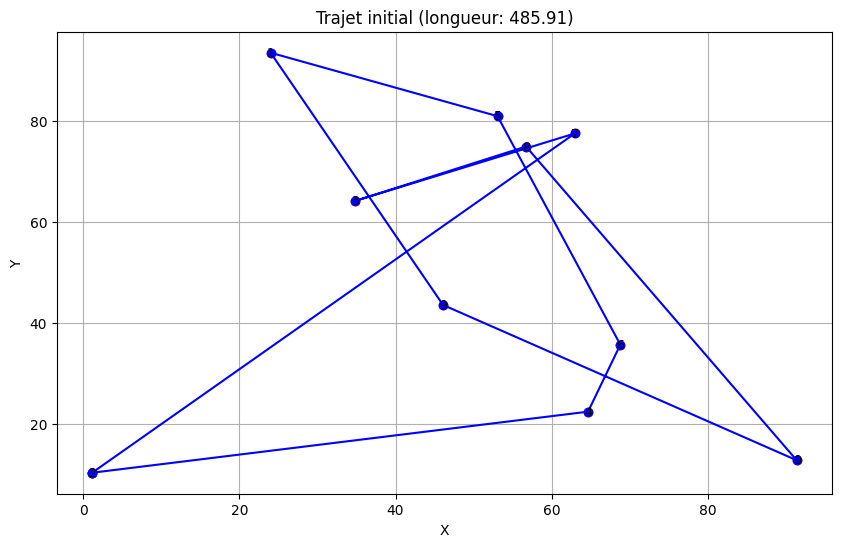

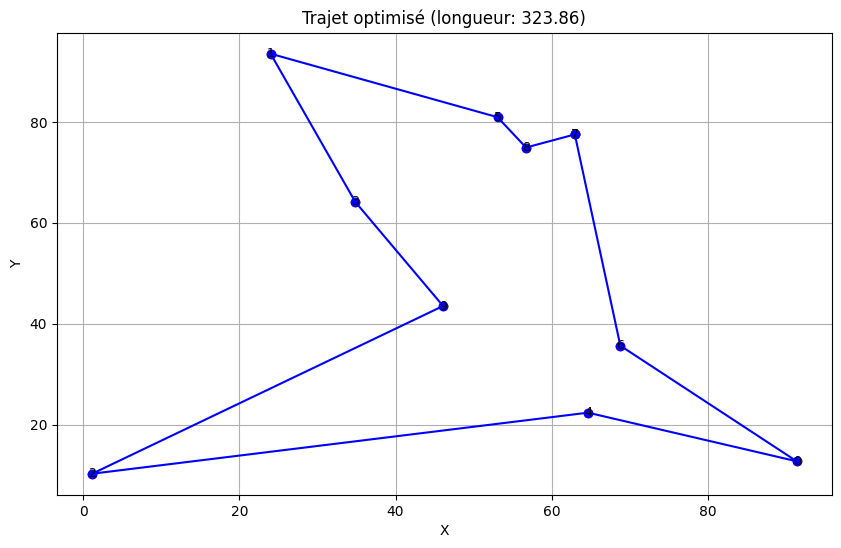

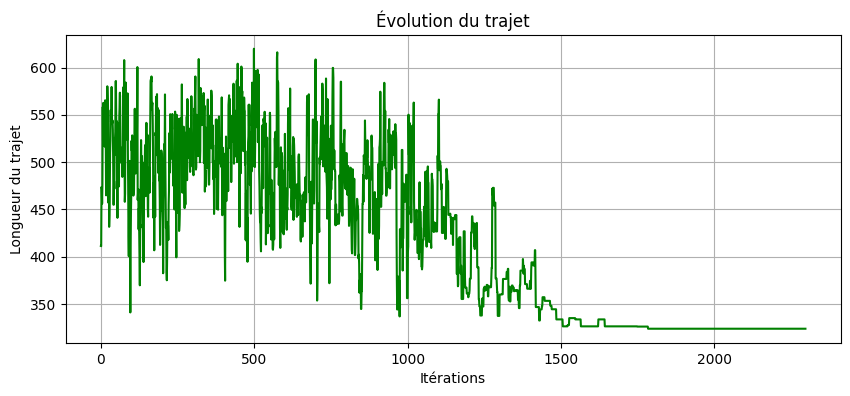


Gain d'optimisation : 33.35%


In [ ]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

# 1. Fonctions de base
# Основные функции

def calculer_distance(v1, v2):
    # Distance entre deux villes théorème de Pythagore
    return math.sqrt((v1[0] - v2[0])**2 + (v1[1] - v2[1])**2)

def longueur_trajet(trajet, villes):
    # Calcule la distance totale du trajet et on boucle pour revenir à la ville de départ
    total = 0
    for i in range(len(trajet)):
        ville1 = villes[trajet[i]]
        ville2 = villes[trajet[(i + 1) % len(trajet)]]  #  pour boucler
        total += calculer_distance(ville1, ville2)
    return total

def permutation_aleatoire(n):
    # Donne une permutation aléatoire des indices des villes
    return np.random.permutation(n)

# les fonctions des mutations

def echange_deux_villes(trajet):
    # On échange deux villes au hasard
    i, j = np.random.choice(len(trajet), 2, replace=False)
    t = trajet.copy()
    t[i], t[j] = t[j], t[i]
    return t

def inversion_segment(trajet):
    # On prend un segment du trajet et on l'inverse effet miroir
    i, j = sorted(random.sample(range(len(trajet)), 2))
    t = trajet.copy()
    t[i:j+1] = list(reversed(t[i:j+1]))  #  on convertit en liste pour éviter l'erreur
    return t

def deplacement_ville(trajet):
    # On déplace une ville d'une position à une autre dans le trajet
    i = np.random.randint(0, len(trajet))
    j = np.random.randint(0, len(trajet))
    while i == j:
        j = np.random.randint(0, len(trajet))
    t = list(trajet.copy())
    ville = t.pop(i)
    t.insert(j, ville)
    return np.array(t)

# La simulation des circuits

def recuit_simule(villes, T_init=10000, alpha=0.99, T_min=0.1, max_iter=10000):
    # On commence avec un trajet complètement aléatoire
    trajet = permutation_aleatoire(len(villes))
    cout = longueur_trajet(trajet, villes)

    # On garde le meilleur trajet trouvé au fur et à mesure
    meilleur_trajet = trajet.copy()
    meilleur_cout = cout

    T = T_init  # Température initiale
    historique = [cout]  # Pour tracer l'évolution du coût

    for _ in range(max_iter):
        if T < T_min:
            break  # Si la température est trop basse, on arrête

        # On choisit une opération de mutation au hasard
        operateur = random.choice([echange_deux_villes, inversion_segment, deplacement_ville])
        nouveau_trajet = operateur(trajet)
        nouveau_cout = longueur_trajet(nouveau_trajet, villes)

        delta = nouveau_cout - cout  # Écart de coût

        # Si le nouveau trajet est meilleur OU si on a "de la chance", on l'accepte
        if delta < 0 or np.random.random() < math.exp(-delta / T):
            trajet = nouveau_trajet
            cout = nouveau_cout

            # Si c’est le meilleur trajet qu’on ait vu jusqu’ici, on le garde
            if cout < meilleur_cout:
                meilleur_trajet = trajet.copy()
                meilleur_cout = cout

        T *= alpha  # On diminue la température progressivement
        historique.append(cout)  # On garde trace de l’évolution du coût

    return meilleur_trajet, meilleur_cout, historique


# 4. Fonctions d'affichage

def generer_villes(n, x_max=100, y_max=100):
    # Génère des villes aléatoirement sur une carte (coordonnées X/Y)
    return [(np.random.uniform(0, x_max), np.random.uniform(0, y_max)) for _ in range(n)]

def afficher_trajet(villes, trajet, titre=""):
    # Affiche un trajet donné (avec des points reliés)
    x = [villes[i][0] for i in trajet] + [villes[trajet[0]][0]]
    y = [villes[i][1] for i in trajet] + [villes[trajet[0]][1]]

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, 'o-', color='blue')
    plt.scatter(x, y, color='red')
    plt.title(titre)
    for i, (xi, yi) in enumerate(villes):
        plt.text(xi, yi, str(i), fontsize=9, ha='center', va='center')
    plt.grid()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

def afficher_evolution(historique):
    # Affiche l'évolution du coût du trajet pendant le recuit
    plt.figure(figsize=(10, 4))
    plt.plot(historique, color='green')
    plt.title("Évolution du trajet")
    plt.xlabel("Itérations")
    plt.ylabel("Longueur du trajet")
    plt.grid()
    plt.show()

# excutioin des etapes

if __name__ == "__main__":
    # les parametre de la fonction
    nb_villes = 10      # Nombre de villes à visiter
    T_init = 10000        # Température initiale
    alpha = 0.995           # Taux de refroidissement
    max_iter = 50000        # Nombre max d'itérations

    villes = generer_villes(nb_villes)

    # Affichage du trajet initial
    trajet_init = permutation_aleatoire(nb_villes)
    cout_init = longueur_trajet(trajet_init, villes)
    afficher_trajet(villes, trajet_init, f"Trajet initial (longueur: {cout_init:.2f})")

    # Lancement du recuit simulé
    meilleur_trajet, meilleur_cout, historique = recuit_simule(
        villes, T_init=T_init, alpha=alpha, max_iter=max_iter
    )

    # Affichage du trajet optimisé et de l'évolution du coût
    afficher_trajet(villes, meilleur_trajet, f"Trajet optimisé (longueur: {meilleur_cout:.2f})")
    afficher_evolution(historique)

    # On affiche le gain d'optimisation en %
    print(f"\nGain d'optimisation : {((cout_init - meilleur_cout) / cout_init * 100):.2f}%")
